# Diffusion Example

In [3]:
# dependencies
using LFAToolkit
using LinearAlgebra
using Pkg
Pkg.activate("./")
Pkg.instantiate()
using Plots

 Activating environment at `~/Dev/LFAToolkit.jl/examples/jupyter/Project.toml`


In [4]:
# setup
p = 3
dimension = 2

mesh = []
if dimension == 1
   mesh = Mesh1D(1.0)
elseif dimension == 2
   mesh = Mesh2D(1.0, 1.0)
end

# operator
diffusion = GalleryOperator("diffusion", p, p, mesh)

# Jacobi smoother
jacobi = Jacobi(diffusion)

jacobi preconditioner

max eigenvalue: 7.348338494748832


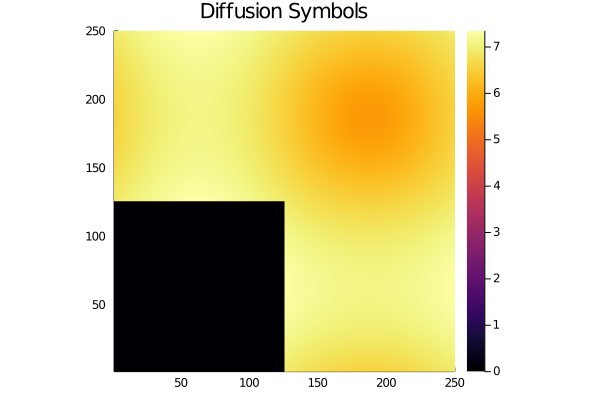

In [8]:
# high frequency operator symbols
numberruns = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = 3π/2
θ_minhigh = π/2

# compute and plot smoothing factor
# -- 1D --
if dimension == 1
    # compute
    maxeigenvalues = zeros(numberruns)

    for i in 1:numberruns
        θ = [θ_min + (θ_max - θ_min)*i/numberruns]
        if θ[1] > θ_minhigh
            A = computesymbols(diffusion, θ)
            eigenvalues = [abs(val) for val in eigvals(A)]
            maxeigenvalues[i] = max(eigenvalues...)
            maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i])
        end
    end

    # plot
    println("max eigenvalue: ", maxeigenvalue)
    plot(maxeigenvalues, title="Diffusion Symbols")
    ylims!(0.0, max(maxeigenvalues...))
# -- 2D --
elseif dimension == 2
    # compute
    maxeigenvalues = zeros(numberruns, numberruns)

    for i in 1:numberruns, j in 1:numberruns
        θ = [
            θ_min + (θ_max - θ_min)*i/numberruns,
            θ_min + (θ_max - θ_min)*j/numberruns
        ]
        if θ[1] > θ_minhigh || θ[2] > θ_minhigh
            A = computesymbols(diffusion, θ)
            eigenvalues = [abs(val) for val in eigvals(A)]
            maxeigenvalues[i, j] = max(eigenvalues...)
            maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i, j])
        end
    end

    # plot
    println("max eigenvalue: ", maxeigenvalue)
    heatmap(maxeigenvalues, title="Diffusion Symbols", transpose=true, aspect_ratio=:equal)
    xlims!(1, numberruns)
    ylims!(1, numberruns)
end

max eigenvalue: 7.67599055622361


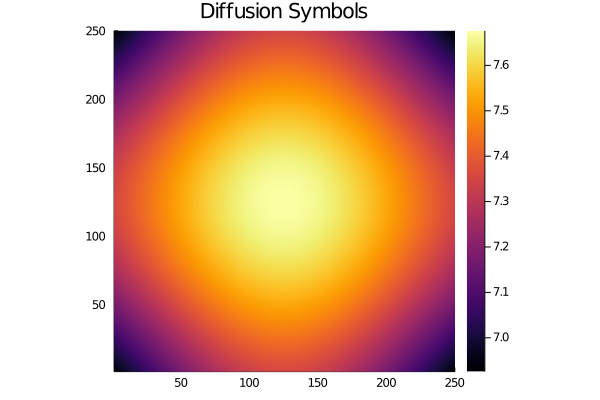

In [6]:
# low frequency operator symbols
numberruns = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = π/2

# compute and plot smoothing factor
# -- 1D --
if dimension == 1
    # compute
    maxeigenvalues = zeros(numberruns)

    for i in 1:numberruns
        θ = [θ_min + (θ_max - θ_min)*i/numberruns]
        A = computesymbols(diffusion, θ)
        eigenvalues = [abs(val) for val in eigvals(A)]
        maxeigenvalues[i] = max(eigenvalues...)
        maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i])
    end

    # plot
    println("max eigenvalue: ", maxeigenvalue)
    plot(maxeigenvalues, title="Diffusion Symbols")
    ylims!(0.0, max(maxeigenvalues...))
# -- 2D --
elseif dimension == 2
    # compute
    maxeigenvalues = zeros(numberruns, numberruns)

    for i in 1:numberruns, j in 1:numberruns
        θ = [
            θ_min + (θ_max - θ_min)*i/numberruns,
            θ_min + (θ_max - θ_min)*j/numberruns
        ]
        A = computesymbols(diffusion, θ)
        eigenvalues = [abs(val) for val in eigvals(A)]
        maxeigenvalues[i, j] = max(eigenvalues...)
        maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i, j])
    end

    # plot
    println("max eigenvalue: ", maxeigenvalue)
    heatmap(maxeigenvalues, title="Diffusion Symbols", transpose=true, aspect_ratio=:equal)
    xlims!(1, numberruns)
    ylims!(1, numberruns)
end

max eigenvalue: 7.675931662517088


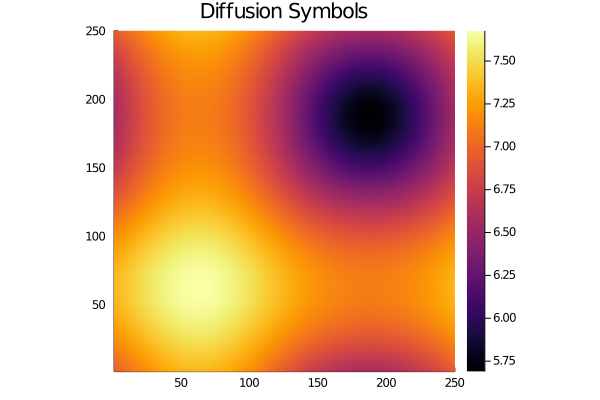

In [7]:
# compute full operator symbols
numberruns = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = 3π/2

# compute and plot smoothing factor
# -- 1D --
if dimension == 1
    # compute
    maxeigenvalues = zeros(numberruns)

    for i in 1:numberruns
        θ = [θ_min + (θ_max - θ_min)*i/numberruns]
        A = computesymbols(diffusion, θ)
        eigenvalues = [abs(val) for val in eigvals(A)]
        maxeigenvalues[i] = max(eigenvalues...)
        maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i])
    end

    # plot
    println("max eigenvalue: ", maxeigenvalue)
    plot(maxeigenvalues, title="Diffusion Symbols")
    ylims!(0.0, max(maxeigenvalues...))
# -- 2D --
elseif dimension == 2
    # compute
    maxeigenvalues = zeros(numberruns, numberruns)

    for i in 1:numberruns, j in 1:numberruns
        θ = [
            θ_min + (θ_max - θ_min)*i/numberruns,
            θ_min + (θ_max - θ_min)*j/numberruns
        ]
        A = computesymbols(diffusion, θ)
        eigenvalues = [abs(val) for val in eigvals(A)]
        maxeigenvalues[i, j] = max(eigenvalues...)
        maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i, j])
    end

    # plot
    println("max eigenvalue: ", maxeigenvalue)
    heatmap(maxeigenvalues, title="Diffusion Symbols", transpose=true, aspect_ratio=:equal)
    xlims!(1, numberruns)
    ylims!(1, numberruns)
end